In [2]:

%matplotlib inline
import numpy as np
from scipy import special
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import pickle as pkl
import networkx as nx

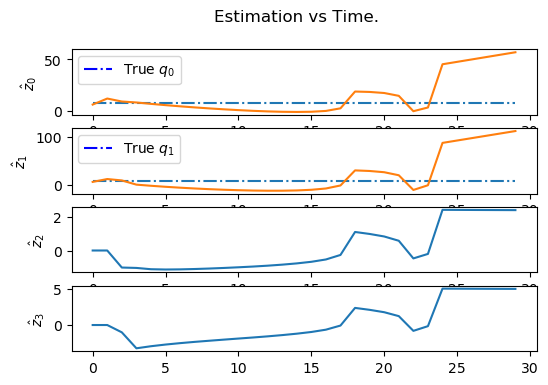

In [157]:
from matplotlib.lines import Line2D


expr= 'EKF-Debug'
filepath = "{}.pkl".format(expr)
with open(filepath,'rb') as file:
    record = pkl.load(file)


qs = record['src_locs']['source_1']

ps = np.array([locs for sensor, locs in record['sensor_locs'].items()])


fig, ax = plt.subplots(4,dpi=100)

fig.suptitle('Estimation vs Time.')
for _ in range(4):
    if _<2:
        ax[_].plot(qs[:30,_],'-.')
        custom_lines = [Line2D([0], [0], color='blue', ls='-.'),]
        ax[_].legend(custom_lines, ['True $q_{}$'.format(_)])
    for name,est in record['est_locs_log'].items():
        ax[_].plot(est[:30,_],label=name)
        ax[_].set_ylabel(r'$\hat z_{}$'.format(_))
#     ax[_].legend()


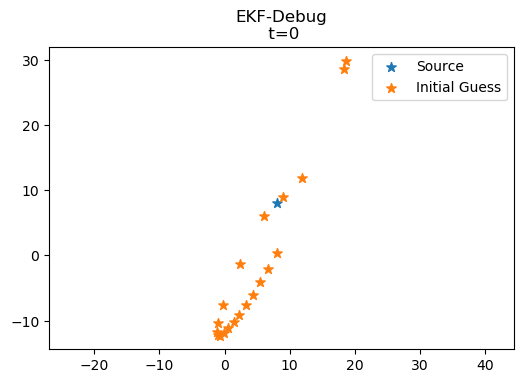

In [158]:
fig, ax = plt.subplots(dpi=100)
ax.cla()
G = record['comm_network'][0]
# nx.draw(G,pos=ps[:,0,:],ax=ax,label='Mobile Sensors',node_size=30) # ps.shape=(n_sensors,N_iter,space_dim)
ax.scatter(qs[0,0],qs[0,1],marker='*',s=50,label='Source')

for name,est in record['est_locs_log'].items():
    ax.scatter([est[:20,0]],[est[:20,1]],marker="*",s=50,label='Initial Guess')

ax.axis('on')
ax.axis('equal')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
# ax.set_xlim((-4,12))
# ax.set_ylim((-4,12))
ax.legend()
ax.set_title(expr+"\n t={}".format(0))
plt.show()


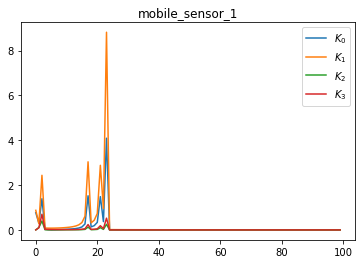

IndexError: tuple index out of range

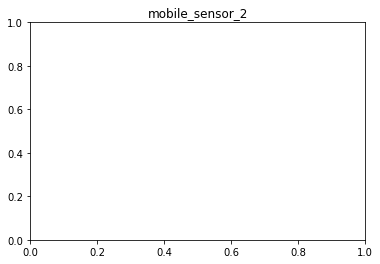

In [159]:
for name in record['Ks'].keys():
    plt.title(name)
#     for j in range(10):
#         print(record['Ks'][name][j])
    ave_K = np.array([np.max(np.abs(K),axis=1) for K in record['Ks'][name]])
    for i in range(ave_K.shape[1]):
        plt.plot(ave_K[:100,i],label=r'$K_{}$'.format(i))
    plt.legend()
    plt.show()

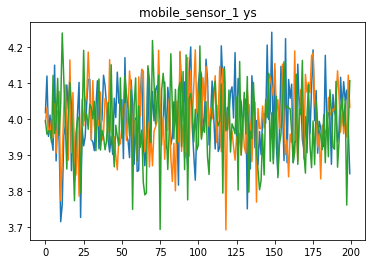

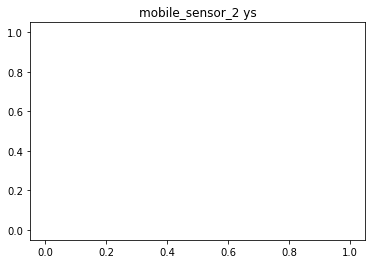

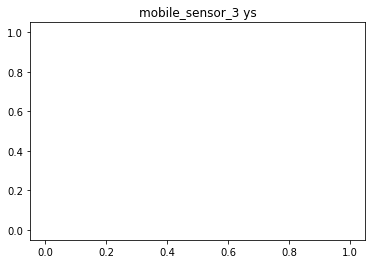

In [160]:
for name in record['ys'].keys():
    plt.title(name+" ys")
    plt.plot(record['ys'][name])
    plt.show()

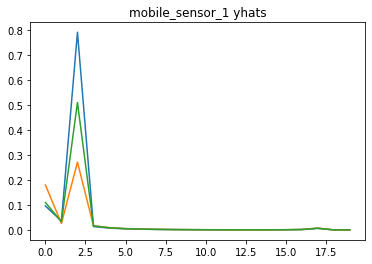

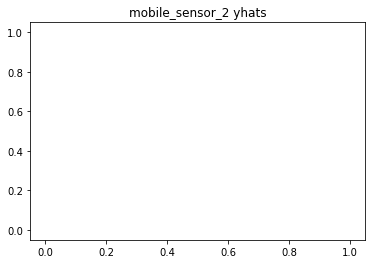

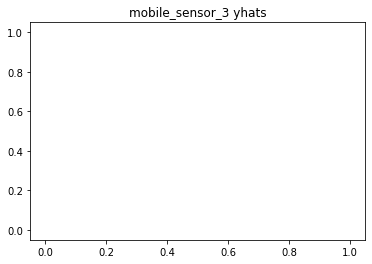

In [162]:
for name in record['yhats'].keys():
    plt.title(name+" yhats")
    plt.plot(record['yhats'][name][:20])
    plt.show()

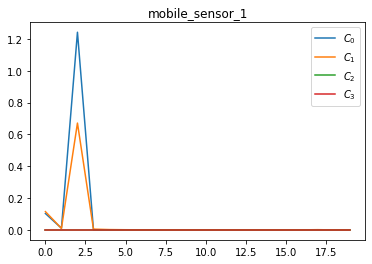

IndexError: tuple index out of range

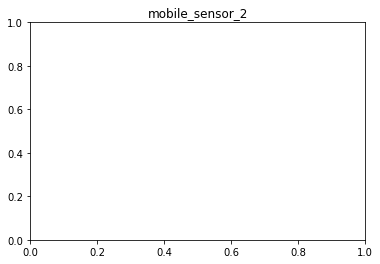

In [164]:
for name in record['Cs'].keys():
    plt.title(name)
    ave_C = np.array([np.max(np.abs(C),axis=0) for C in record['Cs'][name]])
    for i in range(ave_C.shape[1]):
        plt.plot(ave_C[:20,i],label=r'$C_{}$'.format(i))
    plt.legend()
    plt.show()

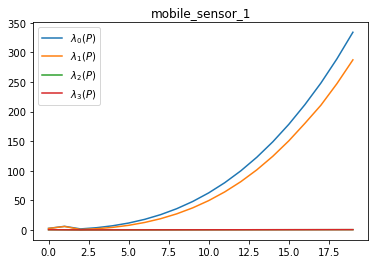

IndexError: tuple index out of range

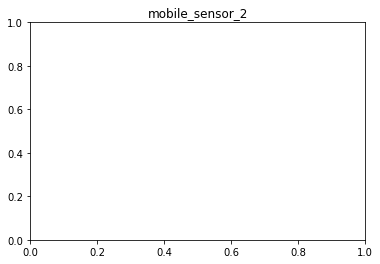

In [165]:
for name in record['Ps'].keys():
    plt.title(name)
    eig_P = np.array([np.linalg.eigvals(P) for P in record['Ps'][name]])
    for i in range(eig_P.shape[1]):
        plt.plot(eig_P[:20,i],label=r'$\lambda_{}(P)$'.format(i))
    plt.legend()
    plt.show()

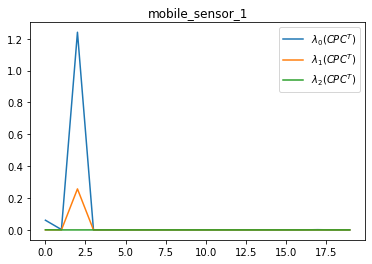

IndexError: tuple index out of range

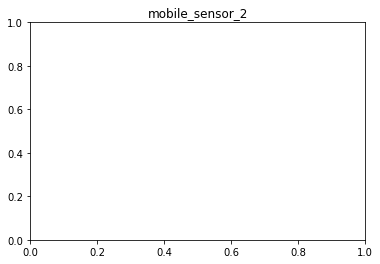

In [166]:
for name in record['Ps'].keys():
    plt.title(name)
    Ps = record['Ps'][name]
    Cs = record['Cs'][name]
    cPc = [C.dot(P).dot(C.T) for P,C in zip(Ps,Cs)]
    eig_cPc = np.array([np.abs(np.linalg.eigvals(A)) for A in cPc ])
    for i in range(eig_cPc.shape[1]):
        plt.plot(eig_cPc[:20,i],label=r'$\lambda_{}(CPC^T)$'.format(i))
    plt.legend()
    plt.show()

IndexError: tuple index out of range

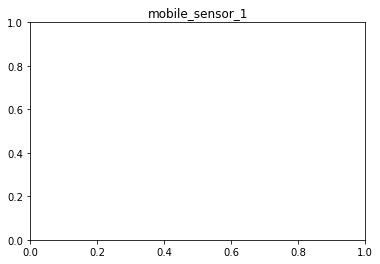

In [167]:
for name in record['Ps'].keys():
    plt.title(name)
    Ps = record['Ps'][name]
    Cs = record['Cs'][name]
    cPPc = [C.dot(P).dot(P).dot(C.T) for P,C in zip(Ps,Cs)]
    eig_cPPc = np.array([np.abs(np.linalg.eigvals(cPPc)) for A in cPc ])
    for i in range(eig_cPc.shape[1]):
        plt.plot(eig_cPc[:20,i],label=r'$\lambda_{}(CPPC^T)$'.format(i))
    plt.legend()
    plt.show()

## Animate experiment

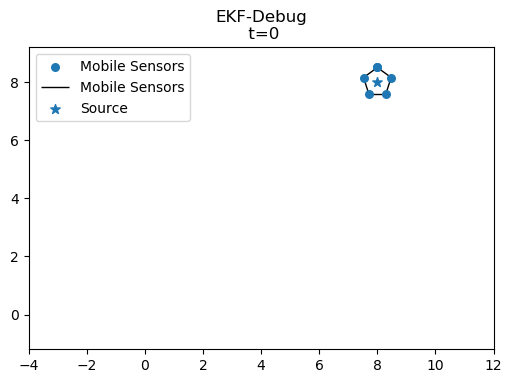

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x400', '-pix_fmt', 'rgba', '-r', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'EKF-Debug.mp4']' returned non-zero exit status 255.

In [11]:

expr= "EKF-Debug"
filepath = "{}.pkl".format(expr)
with open(filepath,'rb') as file:
    record = pkl.load(file)
    
ps = np.array([locs for sensor, locs in record['sensor_locs'].items()])
qs = record['src_locs']['source_1']
N_iter = ps.shape[1]

fig, ax = plt.subplots(dpi=100)
def plot_single_frame(j):
    ax.cla()
    G = record['comm_network'][0]
    nx.draw(G,pos=ps[:,j,:],ax=ax,label='Mobile Sensors',node_size=30) # ps.shape=(n_sensors,N_iter,space_dim)
    ax.scatter(qs[j,0],qs[j,1],marker='*',s=50,label='Source')
    ax.axis('on')
    ax.axis('equal')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.set_xlim((-4,12))
    ax.set_ylim((-4,12))
    ax.legend()
    ax.set_title(expr+"\n t={}".format(j))
    plt.show()


# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, plot_single_frame,
                               frames=N_iter,interval=100)
anim.save('{}.mp4'.format(expr))

In [9]:
HTML(anim.to_html5_video())